In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3115 files belonging to 36 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 351 files belonging to 36 classes.


In [ ]:
cnn= tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size=3, activation= 'relu', input_shape= [64,64,3] ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2,))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size=3, activation= 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2,))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units= 128,activation='relu' ))

In [ ]:
cnn.add(tf.keras.layers.Dense(units= 36, activation= 'softmax'))

In [ ]:
cnn.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)            

In [ ]:
cnn.fit(x= training_set, validation_data= validation_set, epochs= 40)

Epoch 1/40
98/98 [==============================] - 595s 6s/step - loss: 10.4643 - accuracy: 0.0289 - val_loss: 3.5151 - val_accuracy: 0.0712
Epoch 2/40
98/98 [==============================] - 72s 681ms/step - loss: 4.8975 - accuracy: 0.0478 - val_loss: 3.3079 - val_accuracy: 0.1197
Epoch 3/40
98/98 [==============================] - 76s 736ms/step - loss: 3.7018 - accuracy: 0.0783 - val_loss: 3.2128 - val_accuracy: 0.1652
Epoch 4/40
98/98 [==============================] - 73s 694ms/step - loss: 3.7399 - accuracy: 0.0950 - val_loss: 3.0021 - val_accuracy: 0.2393
Epoch 5/40
98/98 [==============================] - 72s 689ms/step - loss: 3.4989 - accuracy: 0.1515 - val_loss: 3.2403 - val_accuracy: 0.2165
Epoch 6/40
98/98 [==============================] - 72s 700ms/step - loss: 3.4666 - accuracy: 0.2106 - val_loss: 2.5589 - val_accuracy: 0.3875
Epoch 7/40
98/98 [==============================] - 75s 726ms/step - loss: 3.0967 - accuracy: 0.2520 - val_loss: 2.5550 - val_accuracy: 0.4330


In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history = cnn.history

In [ ]:
training_history.history

{'loss': [10.4642915725708,
  4.897549152374268,
  3.7017977237701416,
  3.739884853363037,
  3.4989089965820312,
  3.4665539264678955,
  3.0966737270355225,
  3.5368833541870117,
  3.010610818862915,
  2.5538508892059326,
  2.8792483806610107,
  2.711282968521118,
  2.4550259113311768,
  2.0400776863098145,
  1.89029860496521,
  1.6172666549682617,
  1.908538579940796,
  1.538784384727478,
  2.3000025749206543,
  1.8945560455322266,
  1.5989105701446533,
  1.3700799942016602,
  1.3470869064331055,
  1.1906530857086182,
  1.312118649482727,
  1.352351427078247,
  1.0940606594085693,
  1.070489525794983,
  0.897507905960083,
  1.0882915258407593,
  1.020885705947876,
  1.157928228378296,
  0.9852746725082397,
  1.211165189743042,
  0.9784979224205017,
  0.9932981133460999,
  1.2051795721054077,
  0.997975766658783,
  0.7895012497901917,
  0.8991108536720276],
 'accuracy': [0.028892455622553825,
  0.04783306643366814,
  0.07833065837621689,
  0.09502407908439636,
  0.1515248864889145,
  

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 92.59259104728699 %


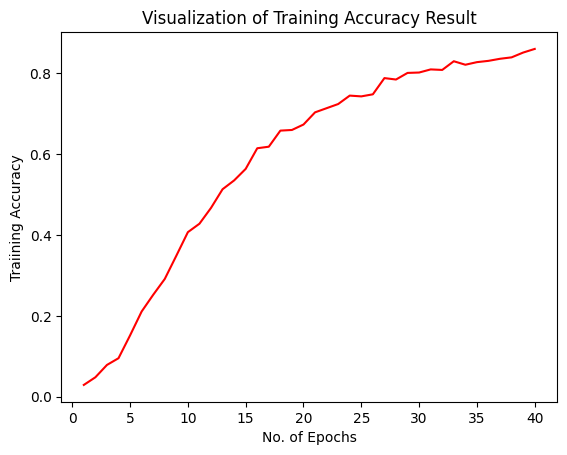

In [ ]:
epochs = [i for i in range(1,41)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


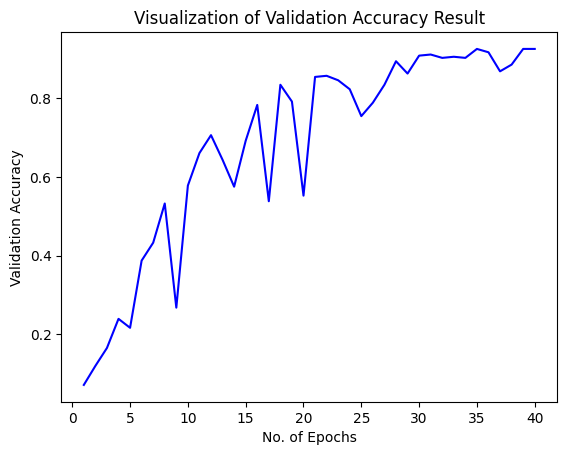

In [ ]:

plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()


--TEST SET EVALUATION


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 110s 878ms/step - loss: 1.6272 - accuracy: 0.9248
Test accuracy: 0.9247910976409912
